In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [2]:
df = pd.read_excel('netflix_titles.xlsx')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.drop(columns=['show_id'], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8809 non-null   object
 1   title         8809 non-null   object
 2   director      6175 non-null   object
 3   cast          7984 non-null   object
 4   country       7978 non-null   object
 5   date_added    8799 non-null   object
 6   release_year  8809 non-null   int64 
 7   rating        8805 non-null   object
 8   duration      8806 non-null   object
 9   listed_in     8809 non-null   object
 10  description   8809 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.2+ KB


## DataFrame Info:
- Total entries: 8806
- Columns: 11
- Data types:
  - 1 column int64
  - 10 columns object
- Memory usage: 825.6 KB

## Statistical Description:
### Categorical Columns:
- **type**: 2 unique values (Movie, TV Show)
- **title**: 8806 unique values
- **director**: 4530 unique values
- **cast**: 7695 unique values
- **country**: 749 unique values
- **rating**: 19 unique values
- **duration**: 221 unique values
- **listed_in**: 516 unique values
- **description**: 8777 unique values

### Numerical Columns:
- **release_year**: Release year with a range between 1925 and 2024.


In [5]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [29]:
df.fillna({'director':'Unknown'}, inplace=True)

df.fillna({'cast':'Unknown'}, inplace=True)

df.fillna({'country':'Unknown'}, inplace=True)

df.fillna({'date_added':'2000-01-01'}, inplace=True)

df.fillna({'rating':'Not Rated'}, inplace=True)

df.fillna({'duration':'No Duration specified'}, inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'])

In [7]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
df.duplicated().sum()

3

In [9]:
df.drop_duplicates(inplace=True)

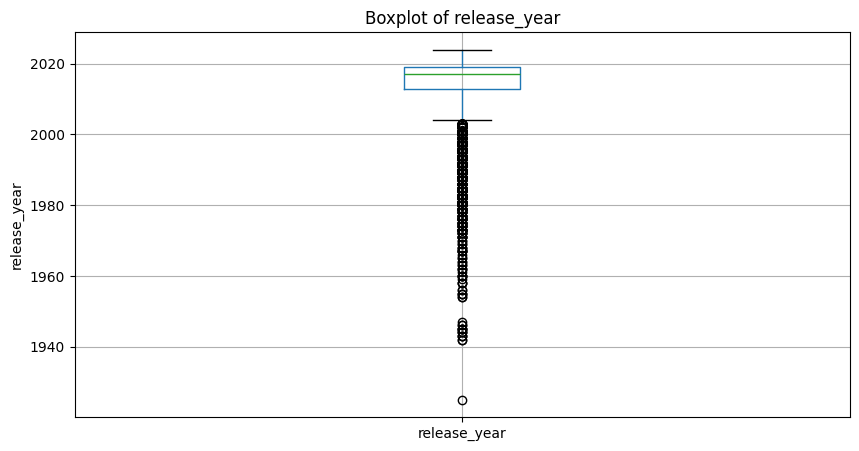

In [10]:
def graficos_boxplot(df):
	  
	  # Select only numeric columns
    df_numerico = df.select_dtypes('number')
    
    # Iterate over each numeric column
    for columna in df_numerico.columns:
        plt.figure(figsize=(10, 5))
        df.boxplot(column=columna)
        plt.title(f'Boxplot of {columna}')
        plt.ylabel(columna)
        plt.show()
        

graficos_boxplot(df)


In [11]:
df.country.value_counts()

country
United States                             2819
India                                      971
Unknown                                    830
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

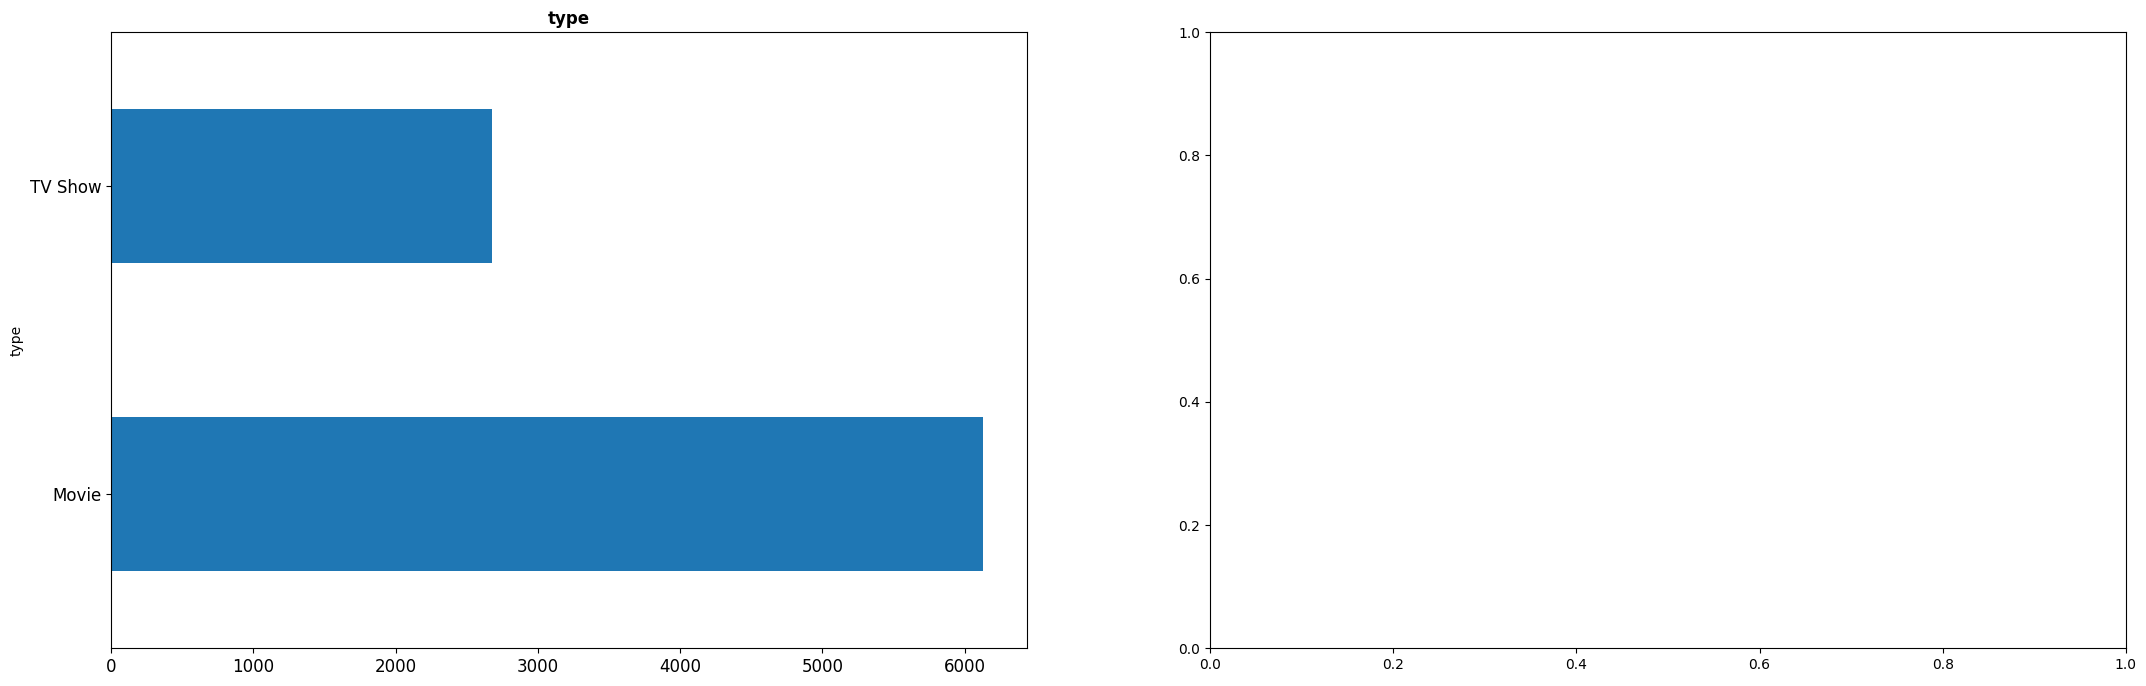

In [12]:
def graficos_eda_categoricos(cat):
    
    # Calculate the number of rows needed
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    # Define the plot
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (26, filas * 8))

    # Flatten to iterate over the plot as if it were 1-dimensional
    ax = ax.flat 

    # Create the loop that adds plots
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
        
graficos_eda_categoricos(df.select_dtypes('O').loc[:,['type']])


In [13]:
text_columns = df.select_dtypes('object').columns
text_columns

Index(['type', 'title', 'director', 'cast', 'country', 'rating', 'duration',
       'listed_in', 'description'],
      dtype='object')

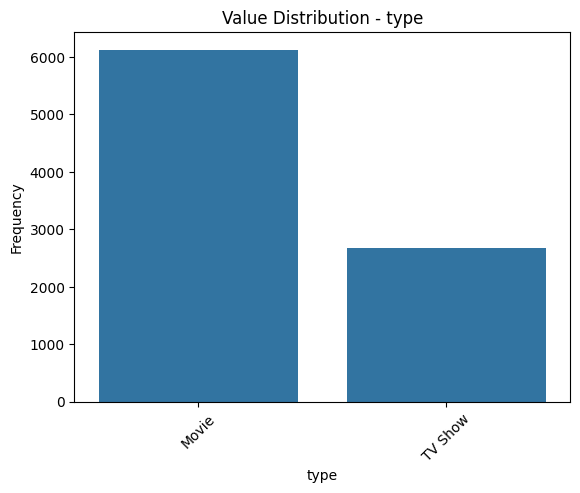

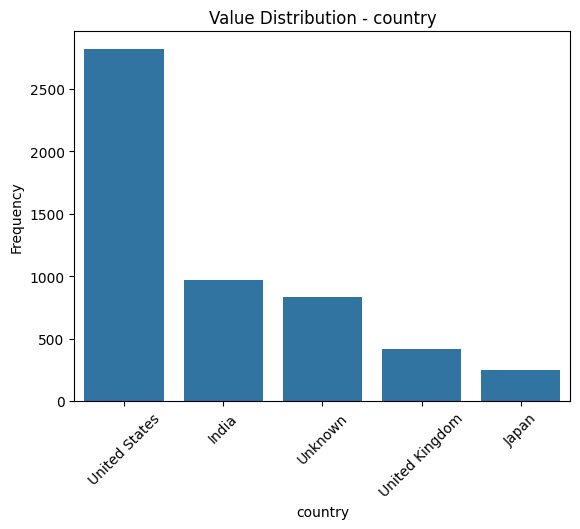

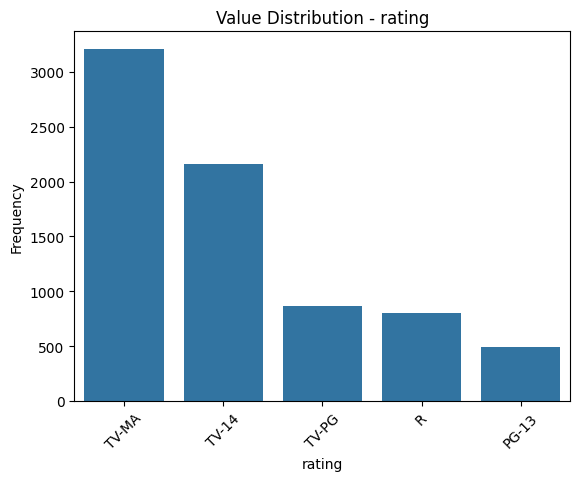

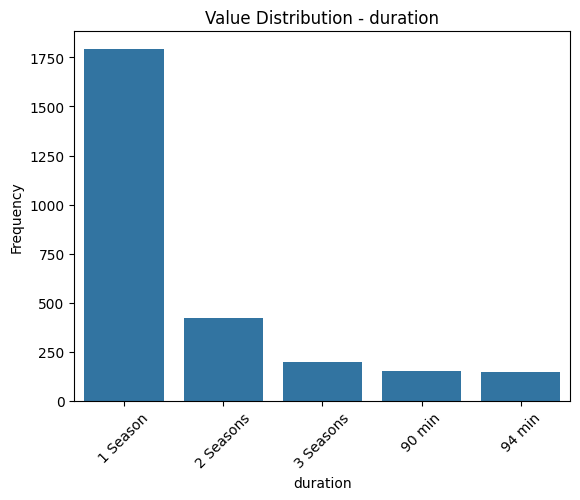

In [14]:
for column in text_columns:
  if(column in ['type', 'country', 'rating', 'duration']):
    a = df[column].value_counts().head()
    sns.barplot(x=a.index, y=a.values)
    plt.title(f"Value Distribution - {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()


## Content Type Distribution on Netflix


type
Movie      6130
TV Show    2676
Name: count, dtype: int64


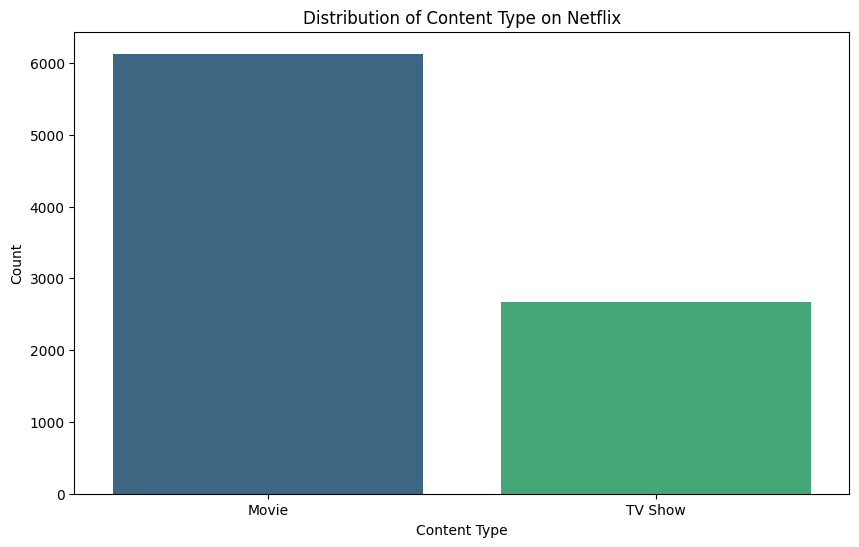

In [15]:
type_counts = df['type'].value_counts()
print(type_counts)

movies = df[df.type == 'Movie']
tv_shows = df[df.type == 'TV Show']

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='viridis', hue='type', dodge=False, legend=False)
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()



- **Movies**: 6130 titles
- **TV Shows**: 2676 titles

Movies dominate the platform, indicating a larger focus on cinematic content, though TV shows also make up a significant portion of the catalog.


## Country of Origin of Content


In [16]:
df.country.value_counts()

country
United States                             2819
India                                      971
Unknown                                    830
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

country
United States     2751
India              961
United Kingdom     532
Unknown            440
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Egypt              102
Hong Kong          100
Nigeria             94
Australia           94
Indonesia           86
Turkey              83
Philippines         80
Belgium             78
Italy               75
Name: count, dtype: int64
country
United States     938
Unknown           390
United Kingdom    272
Japan             199
South Korea       171
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
Mexico             58
China              48
Germany            44
Colombia           32
Brazil             31
Turkey             30
Italy              25
Thailand           24
Singapore          23
Name: count, dtype: int64


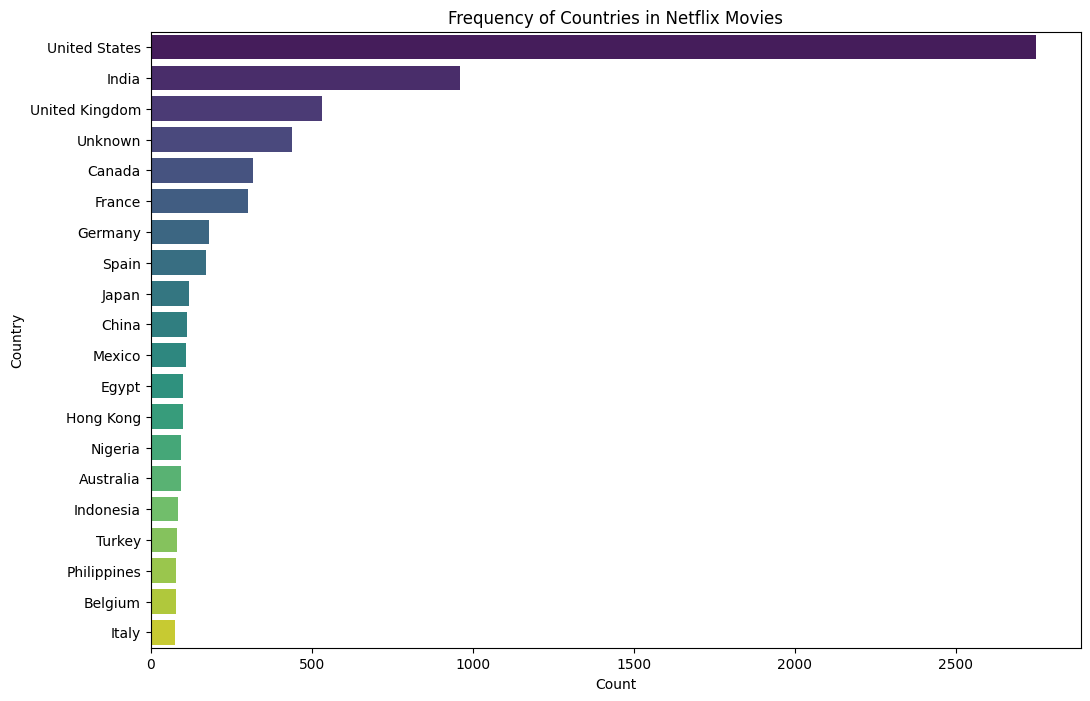

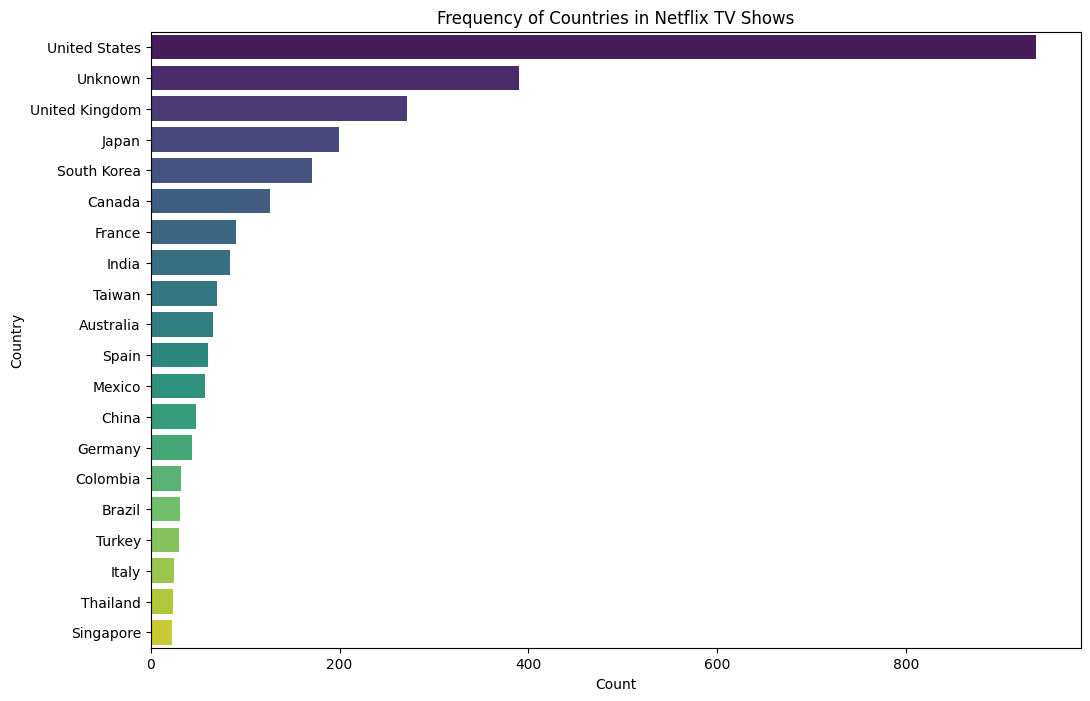

In [17]:
movies_countries = movies['country'].str.split(', ').explode().value_counts().sort_values(ascending=False)
tvshows_countries = tv_shows['country'].str.split(', ').explode().value_counts().sort_values(ascending=False)

print(movies_countries.sort_values(ascending=False).head(20))
print(tvshows_countries.sort_values(ascending=False).head(20))

plt.figure(figsize=(12, 8))
sns.barplot(y=movies_countries.index[:20], x=movies_countries.values[:20], hue=movies_countries.index[:20], dodge=False, palette='viridis')
plt.title('Frequency of Countries in Netflix Movies')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend([], [], frameon=False)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(y=tvshows_countries.index[:20], x=tvshows_countries.values[:20], hue=tvshows_countries.index[:20], dodge=False, palette='viridis')
plt.title('Frequency of Countries in Netflix TV Shows')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend([], [], frameon=False)
plt.show()


### Movies:
**Top 5 Countries:**
- United States: 2751 titles
- India: 961 titles
- United Kingdom: 532 titles
- Unknown: 440 titles
- Canada: 319 titles

### TV Shows:
**Top 5 Countries:**
- United States: 938 titles
- Unknown: 390 titles
- United Kingdom: 272 titles
- Japan: 199 titles
- South Korea: 171 titles

The United States dominates in both movies and TV shows, with significant contributions from India for movies and Japan and South Korea for TV shows.


## Netflix Content Ratings


rating
TV-MA        2062
TV-14        1426
R             796
TV-PG         540
PG-13         490
PG            287
TV-Y7         139
TV-Y          131
TV-G          126
NR             75
G              41
TV-Y7-FV        5
NC-17           3
UR              3
Not Rated       2
74 min          1
84 min          1
66 min          1
A               1
Name: count, dtype: int64
rating
TV-MA        1146
TV-14         732
TV-PG         323
TV-Y7         195
TV-Y          176
TV-G           94
NR              5
R               2
Not Rated       2
TV-Y7-FV        1
Name: count, dtype: int64


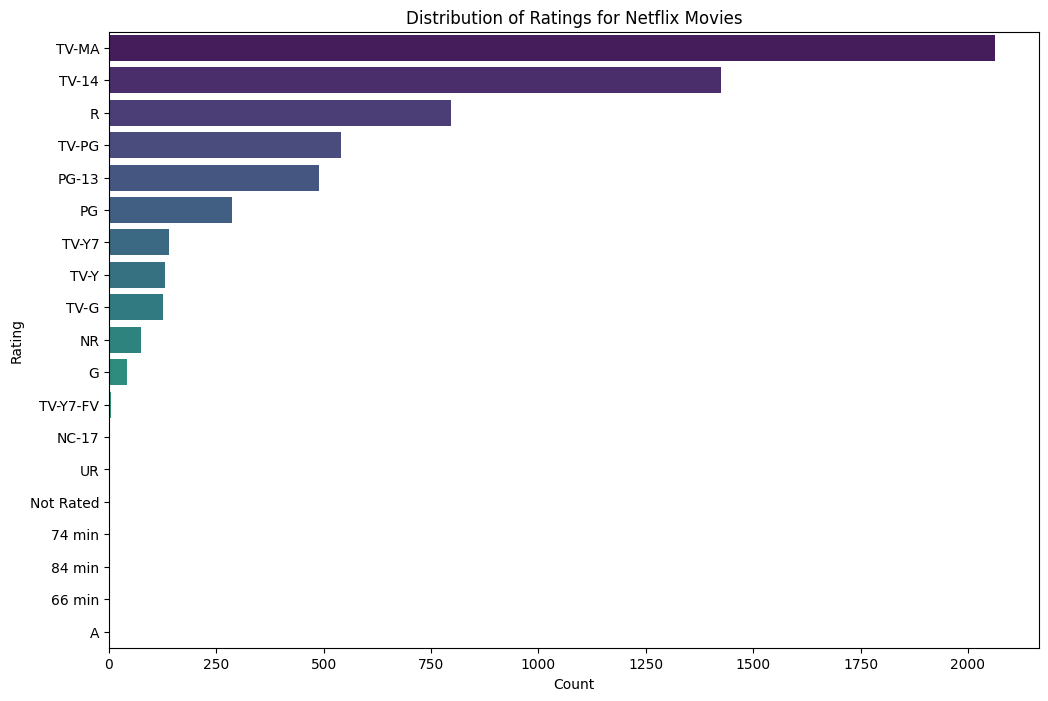

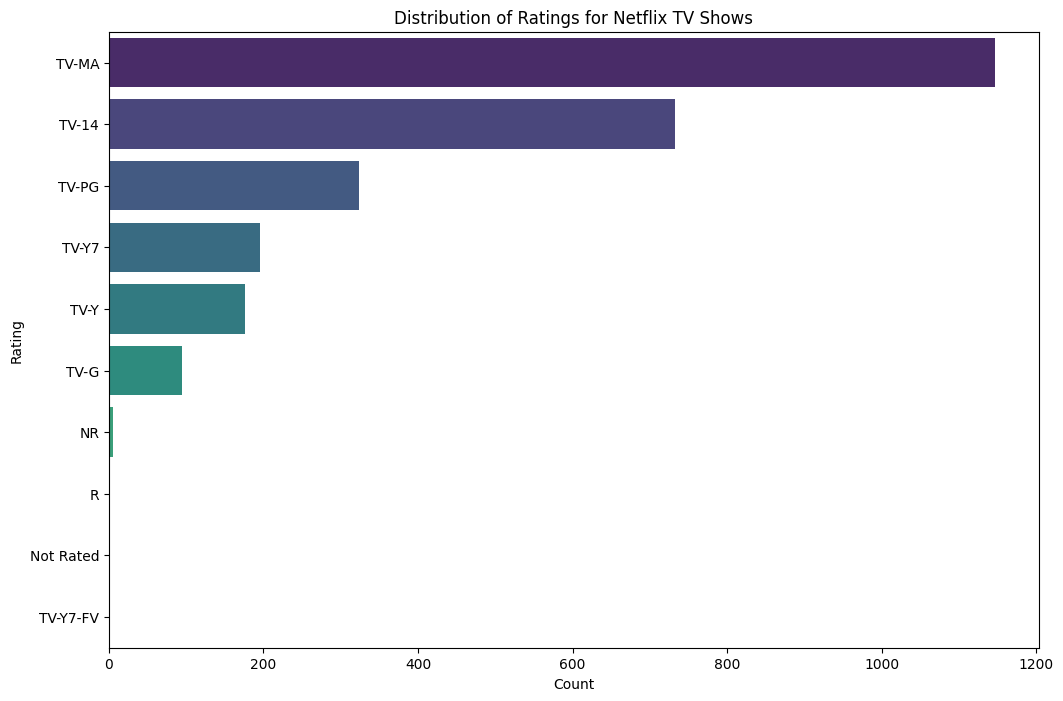

In [18]:
movies_rating_counts = movies['rating'].value_counts()
tvshows_rating_counts = tv_shows['rating'].value_counts()
print(movies_rating_counts)
print(tvshows_rating_counts)

plt.figure(figsize=(12, 8))
sns.barplot(y=movies_rating_counts.index, x=movies_rating_counts.values, hue=movies_rating_counts.index, dodge=False, palette='viridis')
plt.title('Distribution of Ratings for Netflix Movies')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend([], [], frameon=False)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(y=tvshows_rating_counts.index, x=tvshows_rating_counts.values, hue=tvshows_rating_counts.index, dodge=False, palette='viridis')
plt.title('Distribution of Ratings for Netflix TV Shows')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend([], [], frameon=False)
plt.show()



### Movies:
**Top Ratings:**
- TV-MA: 2062 titles
- TV-14: 1426 titles
- R: 796 titles

### TV Shows:
**Top Ratings:**
- TV-MA: 1146 titles
- TV-14: 732 titles
- TV-PG: 323 titles

Most content is rated for mature audiences, with TV-MA being the most frequent rating for both movies and TV shows.


## Distribution of Duration for Netflix Movies and TV Shows


In [19]:
df.duration.value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

C:\Users\juana\AppData\Local\Temp\ipykernel_1860\2020969742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.loc[:, 'duration_num'] = movies['duration'].apply(lambda x: int(x.split()[0]) if x.split()[0] != 'No' else 0)


duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64


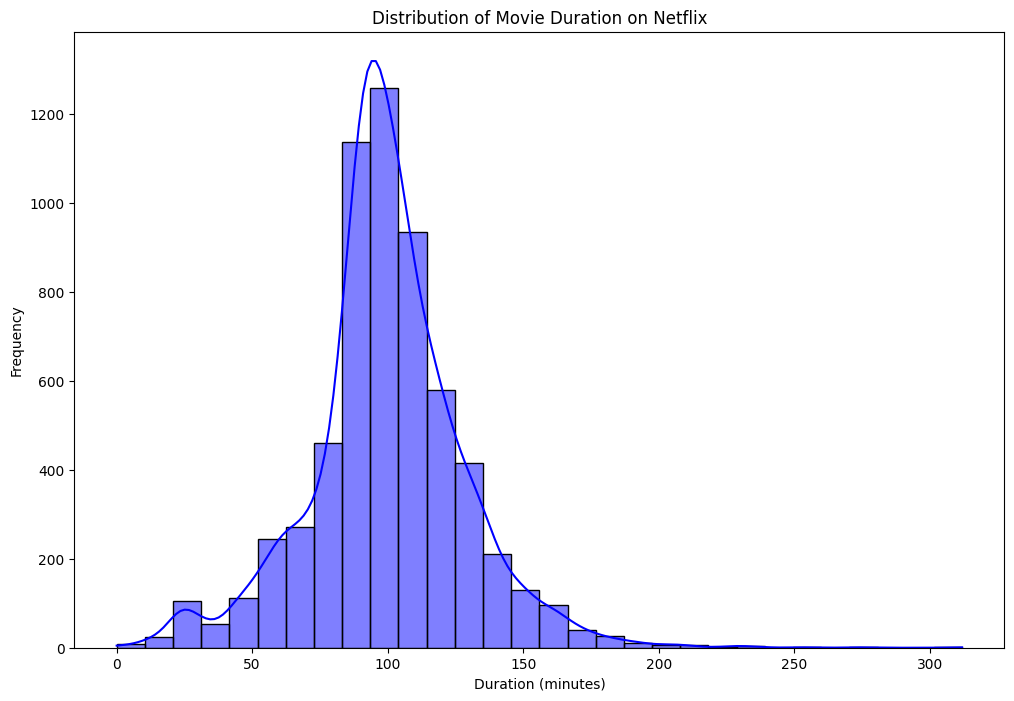

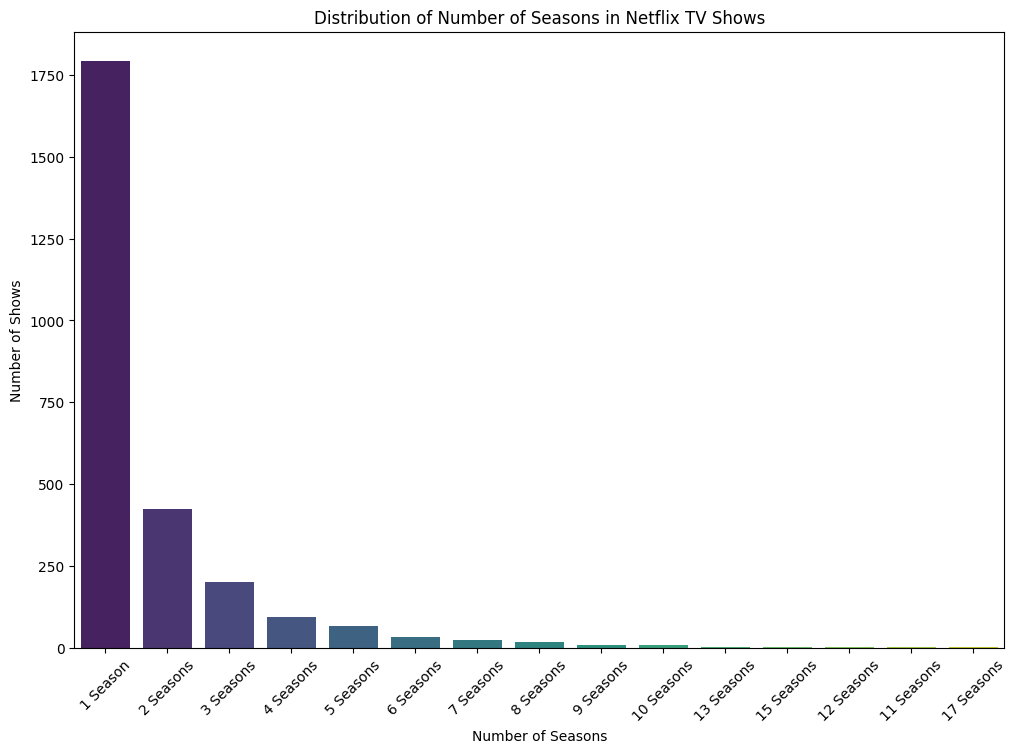

In [20]:
movies.loc[:, 'duration_num'] = movies['duration'].apply(lambda x: int(x.split()[0]) if x.split()[0] != 'No' else 0)

movies_duration = movies['duration_num']
seasons_counts = tv_shows['duration'].value_counts().sort_values(ascending=False)

print(seasons_counts)

plt.figure(figsize=(12, 8))
sns.histplot(movies_duration, kde=True, color='blue', bins=30)
plt.title('Distribution of Movie Duration on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=seasons_counts.index, y=seasons_counts.values, palette='viridis', hue=seasons_counts.index)
plt.title('Distribution of Number of Seasons in Netflix TV Shows')
plt.xlabel('Number of Seasons')
plt.xticks(rotation=45)  
plt.ylabel('Number of Shows')
plt.show()



### Movies:
- **Typical Duration**: 60 to 120 minutes

### TV Shows:
- **Most Common Season Count**: 1 season (1793 titles)

Movies tend to have standard durations, while most TV shows have only one season, indicating a focus on limited series or high content turnover.


## Distribution of Release Year for Movies and TV Shows on Netflix


release_year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    766
2019    632
2020    517
2021    277
Name: count, Length: 73, dtype: int64
release_year
1925      1
1945      1
1946      1
1963      1
1967      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      3
1993      4
1994      2
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      5
2002      7
2003     10
2004      9
2005     13
2006     14
2007     14
2008     23
2009     34
2010     40
2011     40
2012     64
2013     63
2014     88
2015    162
2016    244
2017    265
2018    379
2019    397
2020    436
2021    315
2024      1
Name: count, dtype: int64


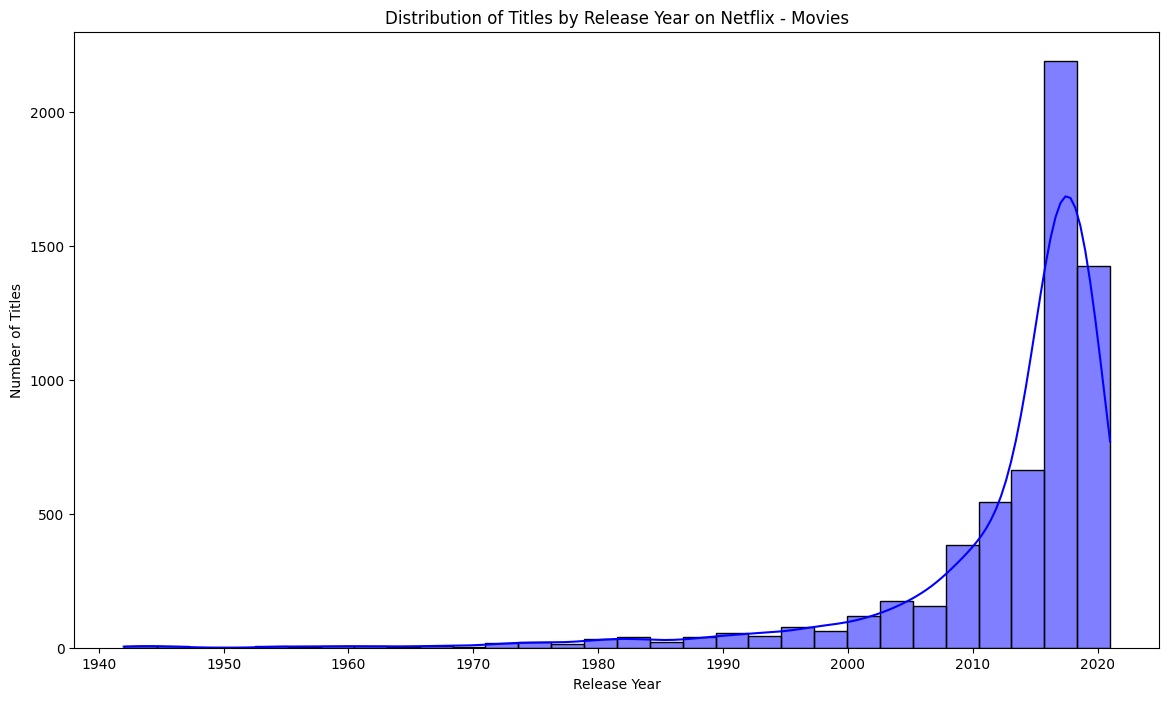

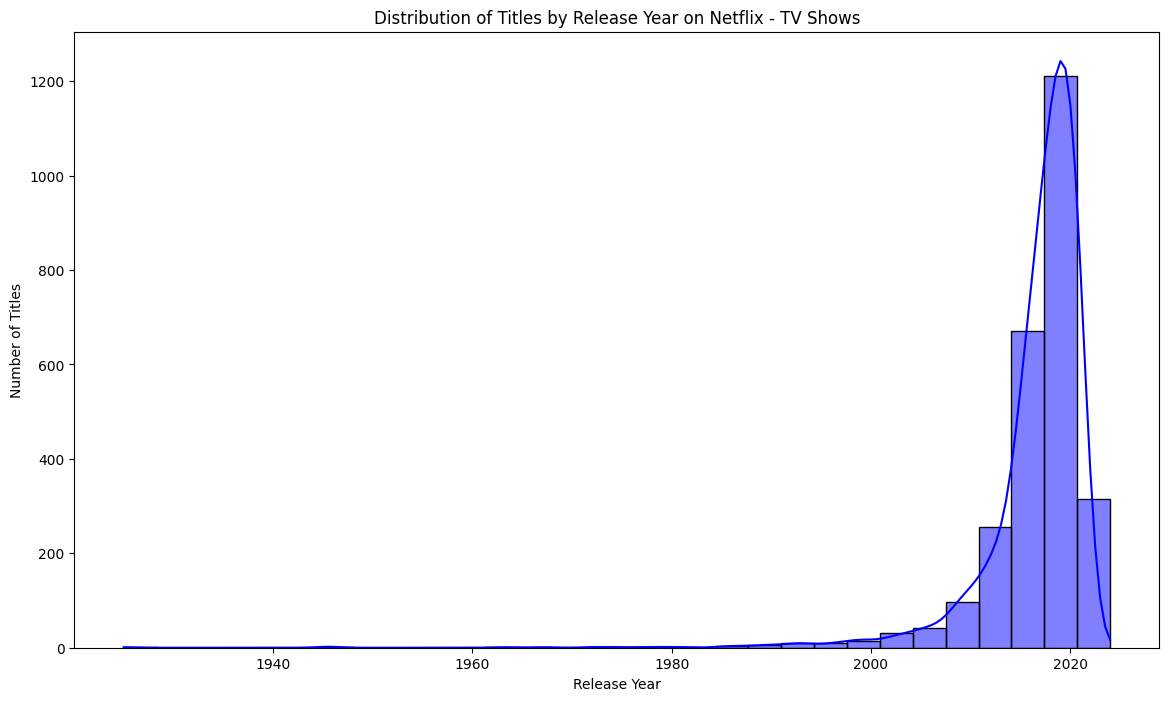

In [21]:
movies_release_year_counts = movies['release_year'].value_counts().sort_index()
tvshows_release_year_counts = tv_shows['release_year'].value_counts().sort_index()
print(movies_release_year_counts)
print(tvshows_release_year_counts)

plt.figure(figsize=(14, 8))
sns.histplot(x=movies['release_year'], kde=True, color='blue', bins=30)
plt.title('Distribution of Titles by Release Year on Netflix - Movies')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(x=tv_shows['release_year'], kde=True, color='blue', bins=30)
plt.title('Distribution of Titles by Release Year on Netflix - TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


### Movies:
**Notable Years:**
- 2017: 767 titles
- 2018: 766 titles
- 2019: 632 titles

### TV Shows:
**Notable Years:**
- 2019: 591 titles
- 2020: 595 titles
- 2018: 412 titles

Both movies and TV shows saw significant releases in the years 2017-2020, reflecting Netflix's growing catalog during this period.


## Distribution of the Year and Month in Which Movies and TV Shows Were Added to Netflix


C:\Users\juana\AppData\Local\Temp\ipykernel_1860\1268431524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.loc[:,'year_added'] = movies['date_added'].dt.year
C:\Users\juana\AppData\Local\Temp\ipykernel_1860\1268431524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.loc[:,'month_added'] = movies['date_added'].dt.month


year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1236
2019    1423
2020    1284
2021     993
2024       1
Name: count, dtype: int64
month_added
1     546
2     382
3     528
4     551
5     439
6     492
7     565
8     519
9     519
10    544
11    498
12    547
Name: count, dtype: int64


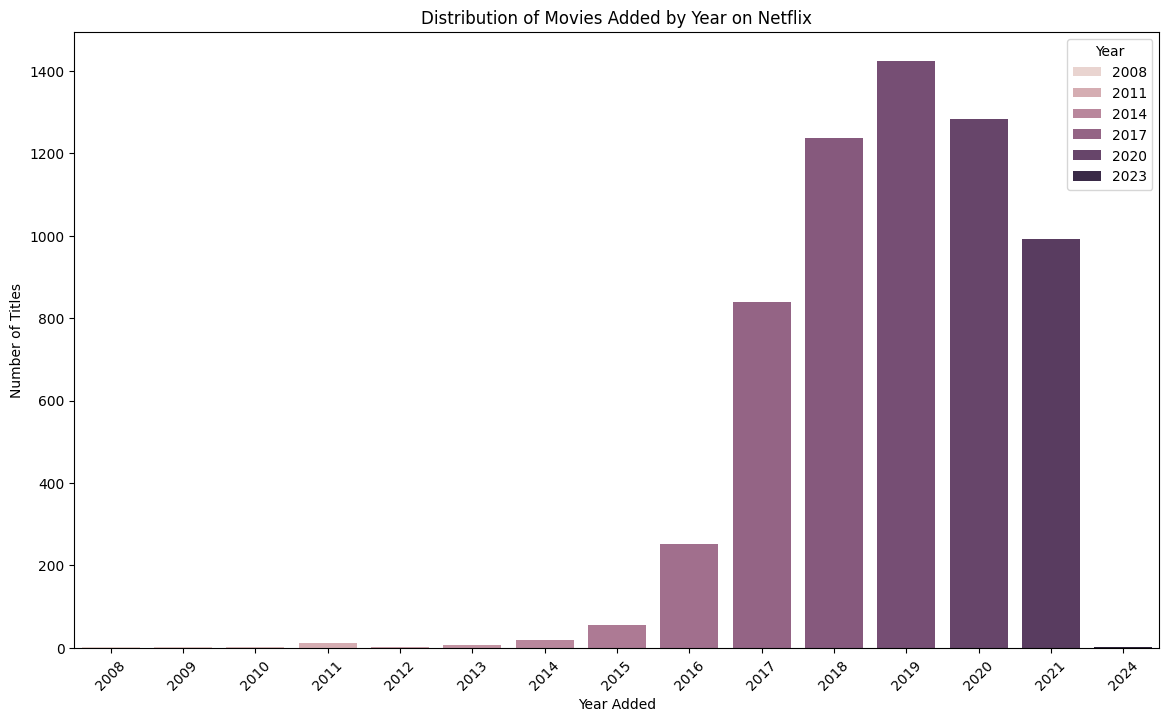

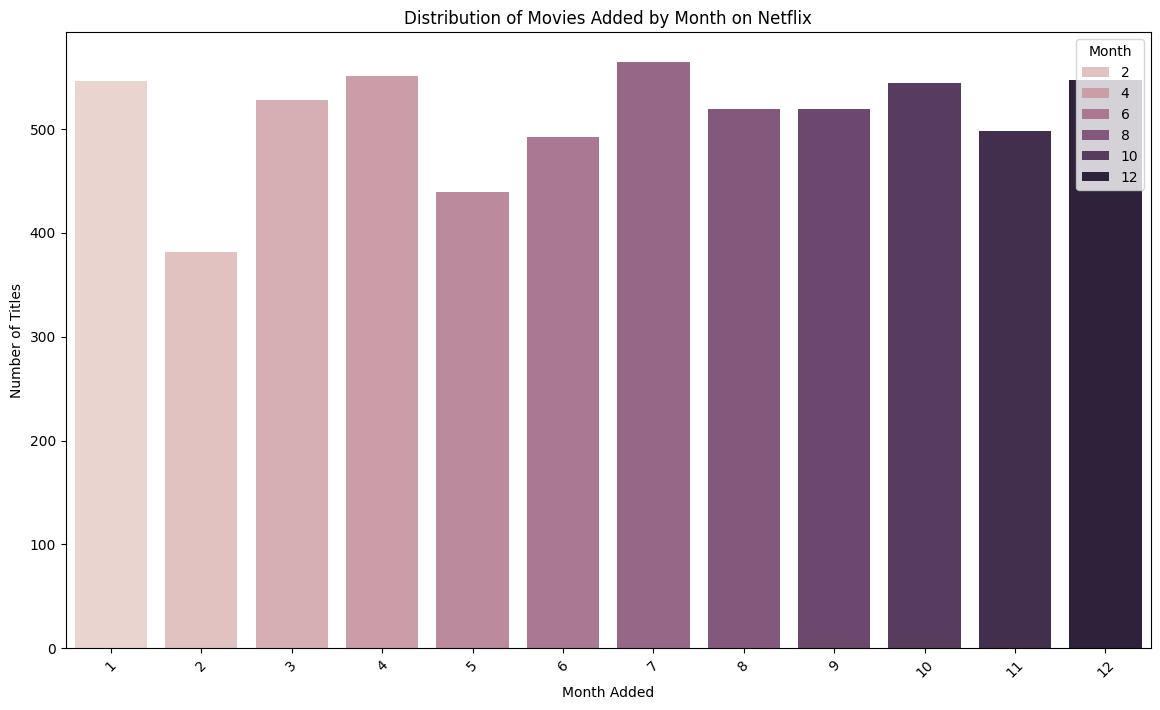

C:\Users\juana\AppData\Local\Temp\ipykernel_1860\1268431524.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows.loc[:,'year_added'] = tv_shows['date_added'].dt.year
C:\Users\juana\AppData\Local\Temp\ipykernel_1860\1268431524.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows.loc[:,'month_added'] = tv_shows['date_added'].dt.month


year_added
2000     10
2008      1
2013      5
2014      5
2015     26
2016    176
2017    349
2018    412
2019    591
2020    595
2021    505
2024      1
Name: count, dtype: int64
month_added
1     202
2     181
3     212
4     215
5     193
6     236
7     262
8     236
9     251
10    215
11    207
12    266
Name: count, dtype: int64


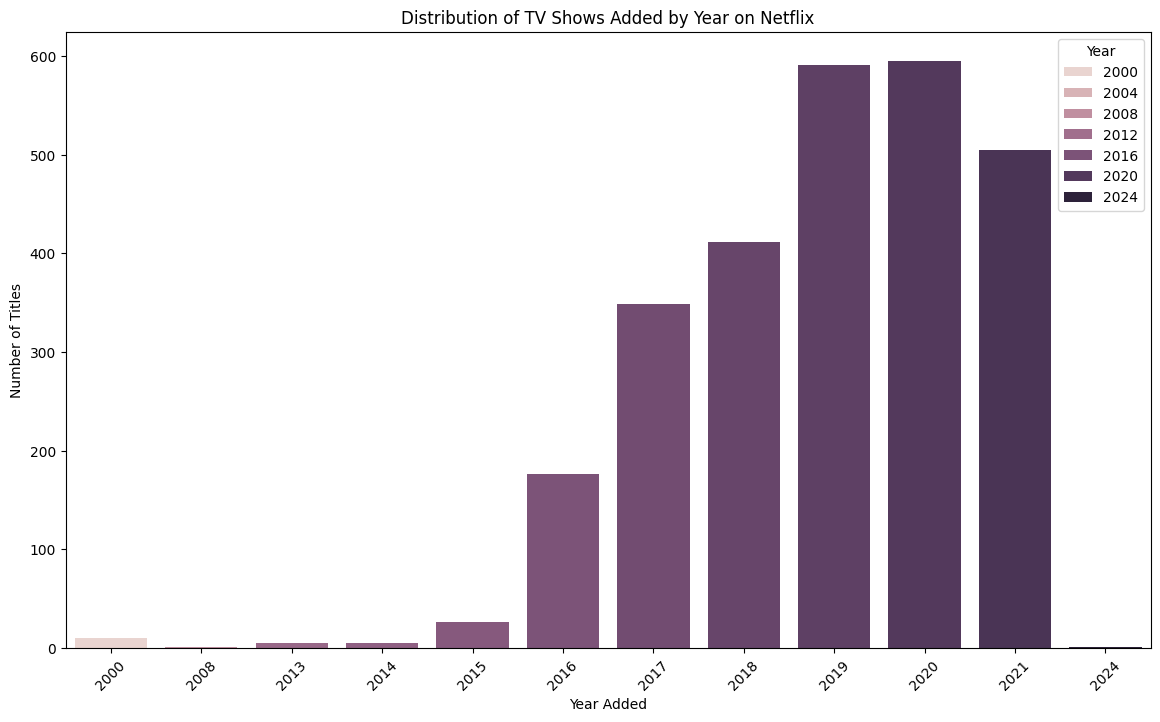

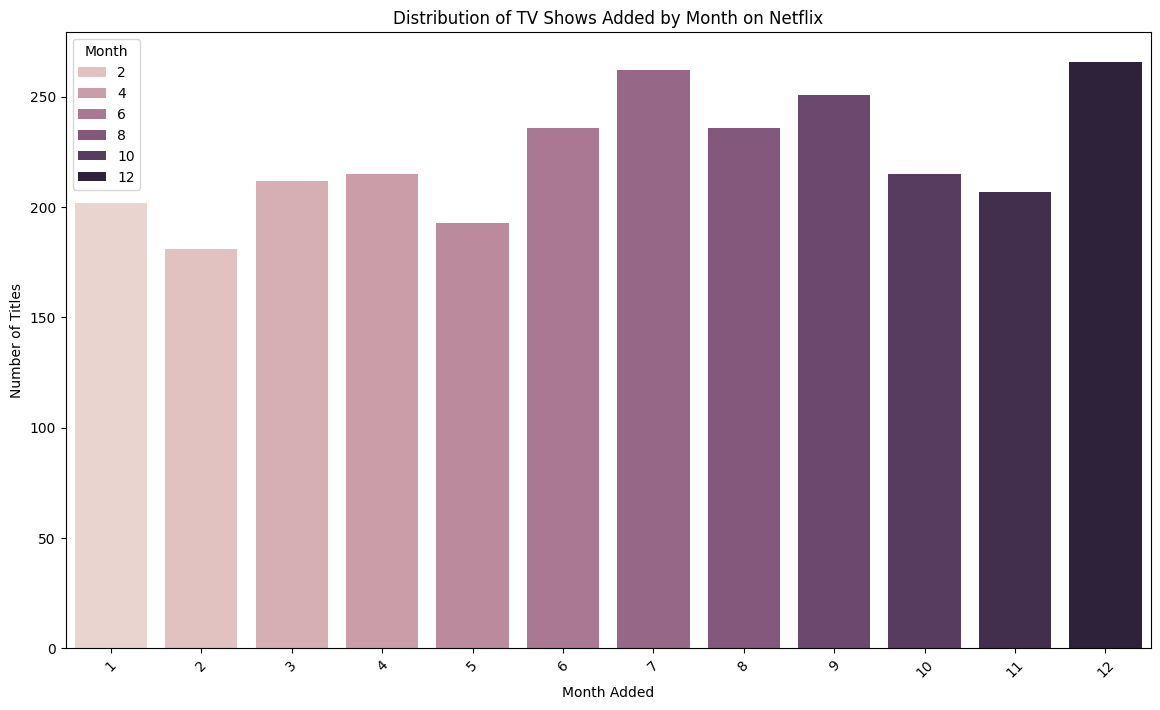

In [22]:
# Extract the year and month from the date_added
movies.loc[:,'year_added'] = movies['date_added'].dt.year
movies.loc[:,'month_added'] = movies['date_added'].dt.month

# Count the number of titles added per year
movies_year_added_counts = movies['year_added'].value_counts().sort_index()
print(movies_year_added_counts)

# Count the number of titles added per month
movies_month_added_counts = movies['month_added'].value_counts().sort_index()
print(movies_month_added_counts)


plt.figure(figsize=(14, 8))
sns.barplot(x=movies_year_added_counts.index, y=movies_year_added_counts.values, hue=movies_year_added_counts.index)
plt.title('Distribution of Movies Added by Year on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)  
plt.legend(title='Year')
plt.show()


plt.figure(figsize=(14, 8))
sns.barplot(x=movies_month_added_counts.index, y=movies_month_added_counts.values, hue=movies_month_added_counts.index)
plt.title('Distribution of Movies Added by Month on Netflix')
plt.xlabel('Month Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45) 
plt.legend(title='Month')
plt.show()


# Extract the year and month from the date_added
tv_shows.loc[:,'year_added'] = tv_shows['date_added'].dt.year
tv_shows.loc[:,'month_added'] = tv_shows['date_added'].dt.month

# Count the number of titles added per year
tvshows_year_added_counts = tv_shows['year_added'].value_counts().sort_index()
print(tvshows_year_added_counts)

# Count the number of titles added per month
tvshows_month_added_counts = tv_shows['month_added'].value_counts().sort_index()
print(tvshows_month_added_counts)


plt.figure(figsize=(14, 8))
sns.barplot(x=tvshows_year_added_counts.index, y=tvshows_year_added_counts.values, hue=tvshows_year_added_counts.index)
plt.title('Distribution of TV Shows Added by Year on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)  
plt.legend(title='Year')
plt.show()


plt.figure(figsize=(14, 8))
sns.barplot(x=tvshows_month_added_counts.index, y=tvshows_month_added_counts.values, hue=tvshows_month_added_counts.index)
plt.title('Distribution of TV Shows Added by Month on Netflix')
plt.xlabel('Month Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45) 
plt.legend(title='Month')
plt.show()


### Movies:
- **Year with Most Additions**: 2019
- **Most Common Months**: July, August, and December

### TV Shows:
- **Year with Most Additions**: 2020
- **Most Common Months**: December, July, and September

Content addition tends to peak during the summer and at the end of the year, likely aligning with strategic periods of high viewer engagement.


## Distribution of Categories for Movies and TV Shows on Netflix


listed_in
International Movies        2752
Dramas                      2425
Comedies                    1673
Documentaries                869
Action & Adventure           859
Independent Movies           755
Children & Family Movies     641
Romantic Movies              616
Thrillers                    576
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Drama                          1
Romance                        1
Thriller                       1
Name: count, dtype: int64
listed_in
International TV Shows          1350
TV Dramas                        762
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries

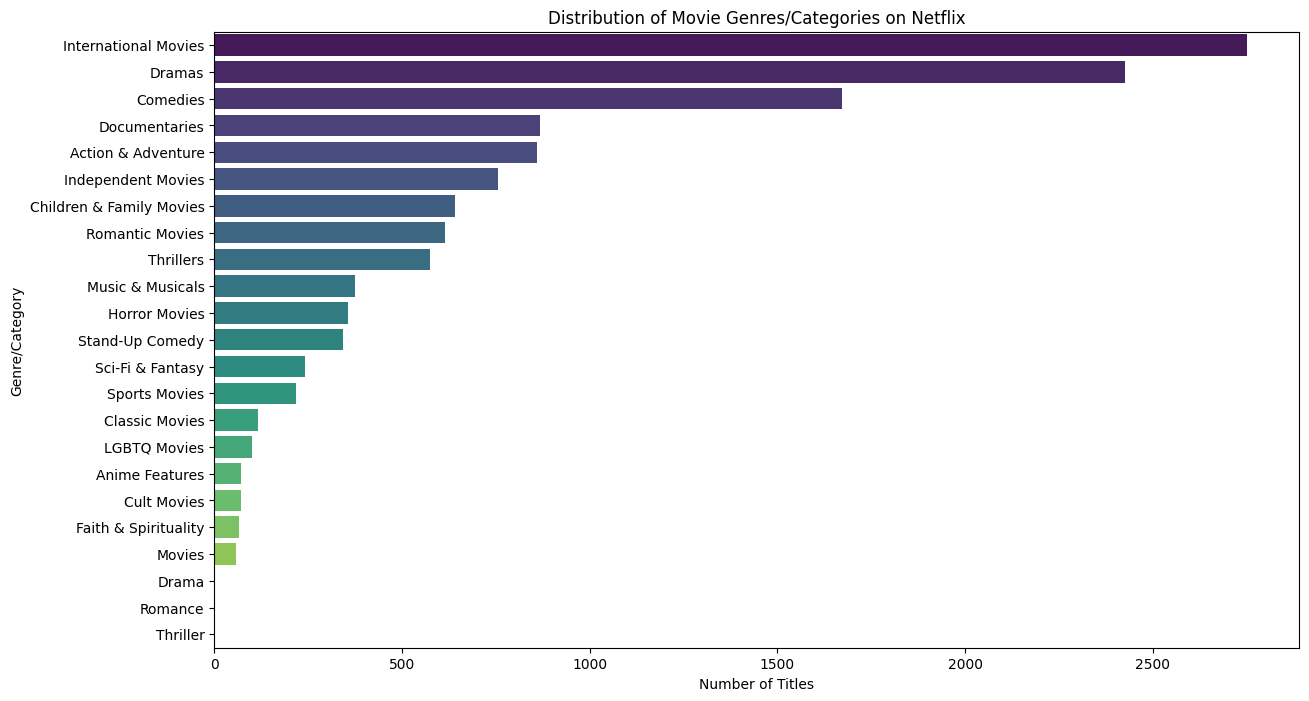

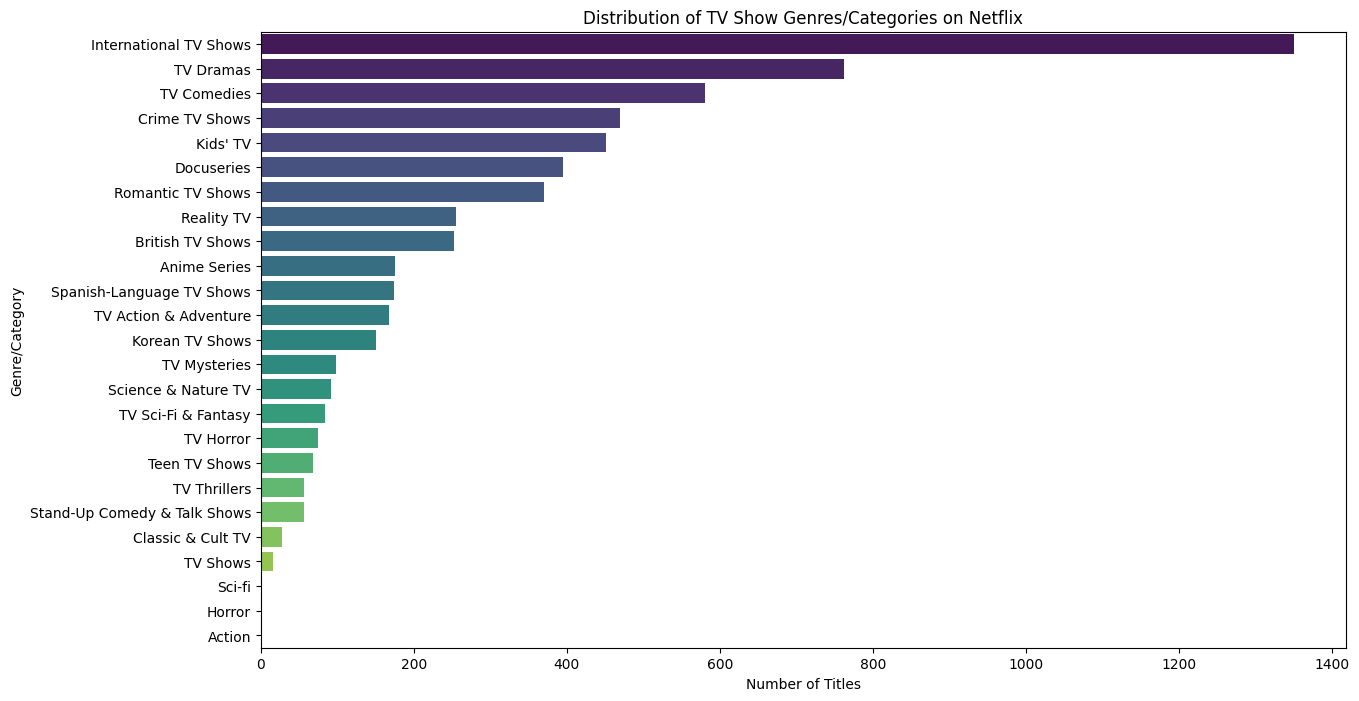

In [23]:
# Distribution of Categories for Movies and TV Shows on Netflix

movies_categories = movies['listed_in'].str.split(', ').explode()
tvshows_categories = tv_shows['listed_in'].str.split(', ').explode()

# Count the occurrence of each genre/category
movies_category_counts = movies_categories.value_counts()
tvshows_category_counts = tvshows_categories.value_counts()
print(movies_category_counts)
print(tvshows_category_counts)

plt.figure(figsize=(14, 8))
sns.barplot(y=movies_category_counts.index[:25], x=movies_category_counts.values[:25], palette='viridis', hue=movies_category_counts.index[:25])
plt.title('Distribution of Movie Genres/Categories on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre/Category')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(y=tvshows_category_counts.index[:25], x=tvshows_category_counts.values[:25], palette='viridis', hue=tvshows_category_counts.index[:25])
plt.title('Distribution of TV Show Genres/Categories on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre/Category')
plt.show()




### Movies:
**Top Genres:**
- International Movies: 2752 titles
- Dramas: 2425 titles
- Comedies: 1673 titles

### TV Shows:
**Top Genres:**
- International TV Shows: 1350 titles
- TV Dramas: 762 titles
- TV Comedies: 581 titles

International content and dramas dominate both movies and TV shows, highlighting Netflix's global reach and focus on emotionally engaging genres.


## Most Common Directors in Netflix Movies and TV Shows

director
Rajiv Chilaka          22
Jan Suter              21
RaÃºl Campos           19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Steven Spielberg       11
Don Michael Paul       10
YÄ±lmaz ErdoÄŸan        9
Shannon Hartman         9
Anurag Kashyap          9
David Dhawan            9
Fernando AyllÃ³n        8
Ryan Polito             8
Quentin Tarantino       8
Hakan AlgÃ¼l            8
Name: count, dtype: int64


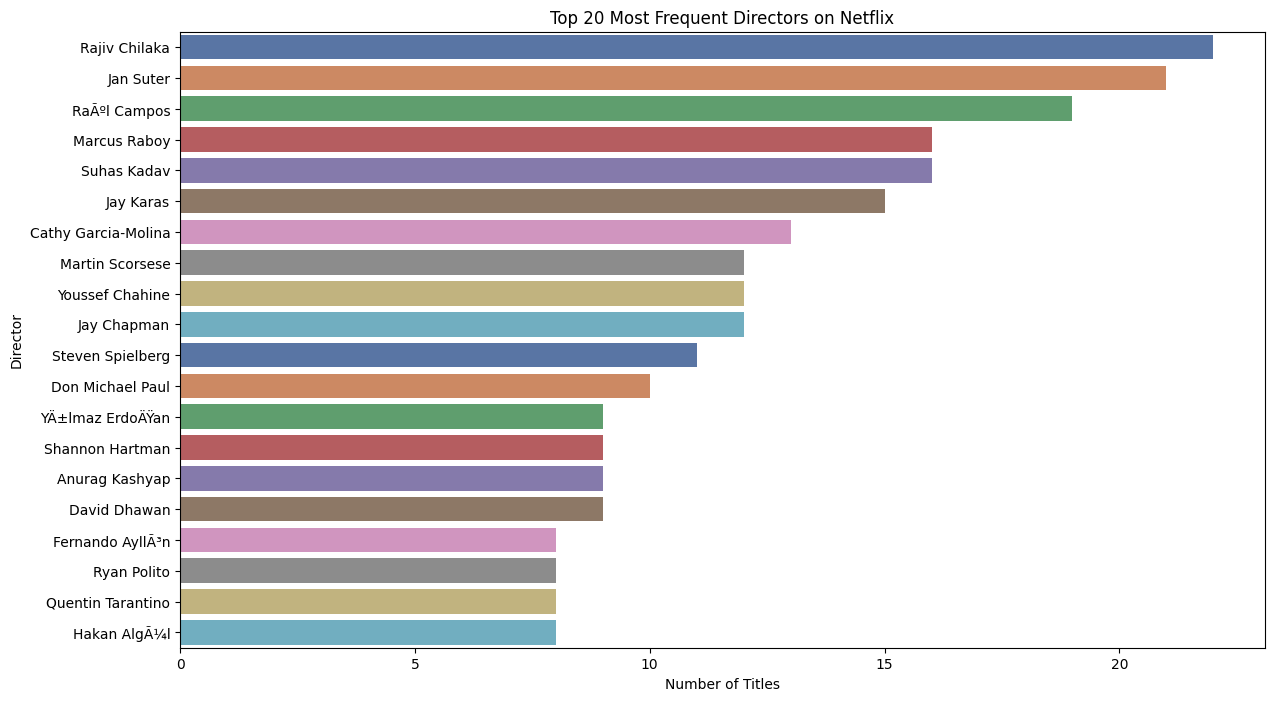

In [24]:
df_directors = df['director'].str.split(', ').explode()
df_directors = df_directors[df_directors != 'Unknown']

director_counts = df_directors.value_counts().head(20)  
print(director_counts)

plt.figure(figsize=(14, 8))
sns.barplot(y=director_counts.index, x=director_counts.values, palette='deep', hue=director_counts.index)
plt.title('Top 20 Most Frequent Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

## Most Frequent Actors in Netflix Movies and TV Shows


cast
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Paresh Rawal         28
Amitabh Bachchan     28
Boman Irani          27
Rajesh Kava          26
Vincent Tong         26
Kareena Kapoor       25
Andrea Libman        25
John Cleese          24
Samuel L. Jackson    24
Tara Strong          23
Jigna Bhardwaj       23
Name: count, dtype: int64


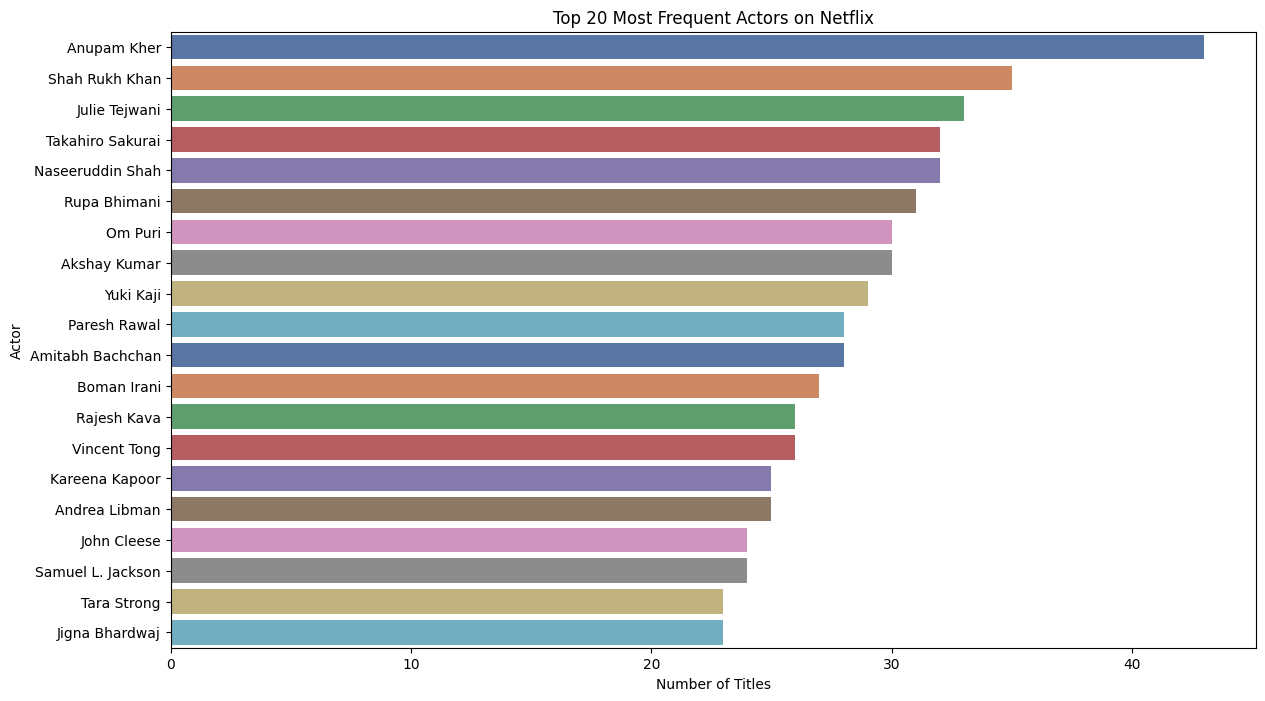

In [25]:
df_actors = df['cast'].str.split(', ').explode()
df_actors = df_actors[df_actors != 'Unknown']

# Count the occurrence of each actor
actor_counts = df_actors.value_counts().head(20)
print(actor_counts)

plt.figure(figsize=(14, 8))
sns.barplot(y=actor_counts.index, x=actor_counts.values, palette='deep', hue=actor_counts.index)
plt.title('Top 20 Most Frequent Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()


### Directors:
**Top 3:**
- Rajiv Chilaka: 22 titles
- Jan Suter: 21 titles
- Raúl Campos: 19 titles

### Actors:
**Top 3:**
- Anupam Kher: 43 titles
- Shah Rukh Khan: 35 titles
- Julie Tejwani: 33 titles

Bollywood figures prominently among the top directors and actors, reflecting the significant presence of Indian content on Netflix.


## Duration vs Release Year


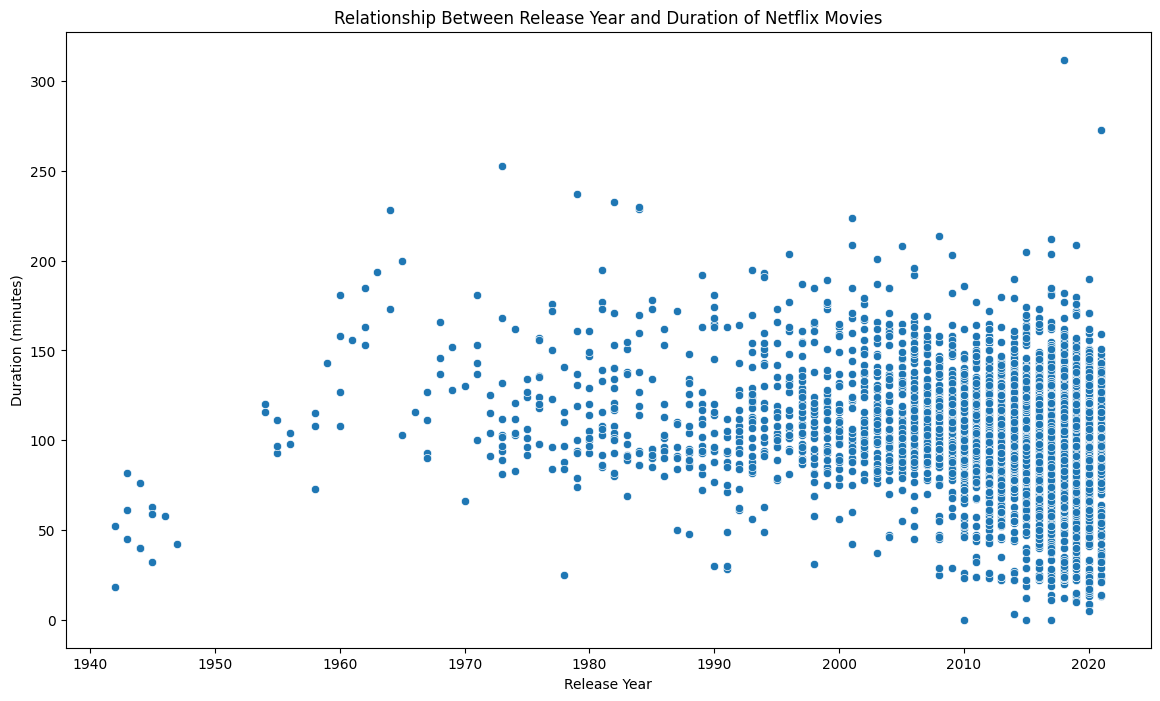

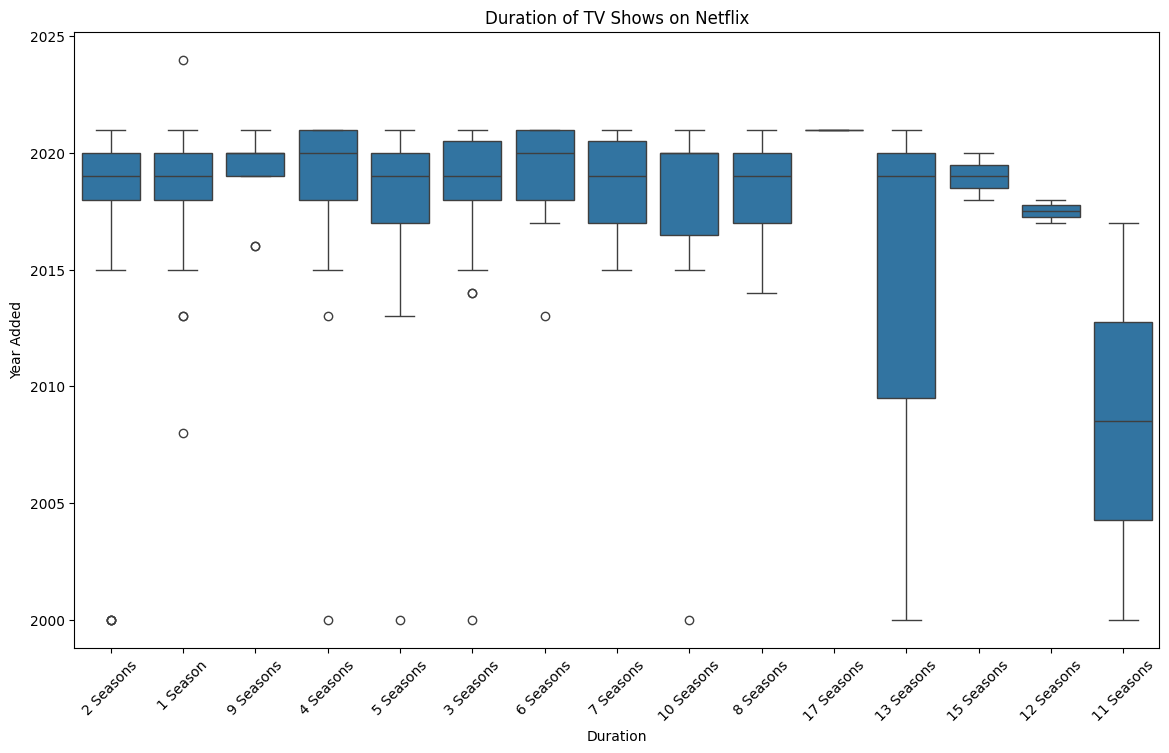

In [26]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=movies, x='release_year', y='duration_num', legend=False)
plt.title('Relationship Between Release Year and Duration of Netflix Movies')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()

# Scatter plot for TV shows
plt.figure(figsize=(14, 8))
sns.boxplot(x='duration', y='year_added', data=tv_shows)
plt.title('Duration of TV Shows on Netflix')
plt.xlabel('Duration')
plt.xticks(rotation=45)
plt.ylabel('Year Added')
plt.show()



# Conclusions

1. **Content Type Distribution**:

   - Netflix’s catalog leans heavily towards movies, with 6130 titles, but TV shows also represent a significant portion, indicating a balanced content strategy aimed at diverse viewer preferences.

2. **Country of Origin for Movies**:

   - The United States dominates Netflix’s movie catalog with 2751 titles, followed by India and the UK, reflecting strong contributions from Hollywood, Bollywood, and British cinema.

3. **Country of Origin for TV Shows**:

   - The United States also leads in TV shows with 938 titles, with notable contributions from Japan and South Korea, underscoring the global appeal of anime and K-dramas.

4. **Strategic Content Focus**:

   - Netflix prioritizes content from the US, UK, and India, capitalizing on their established entertainment industries to attract a broad global audience.


5. **Genre Distribution for Movies and TV Shows**:

   - **Movies**: The most common genres are International Movies, Dramas, and Comedies.
   
   - **TV Shows**: International TV Shows and TV Dramas dominate the TV show categories, reflecting a diverse content strategy.

6. **Rating Distribution for Netflix Movies and TV Shows**:

   - **Movies**: Most movies are rated TV-MA and TV-14, indicating a focus on mature audiences.
   
   - **TV Shows**: The trend is similar for TV shows, with TV-MA being the most common rating, followed by TV-14 and TV-PG.

7. **Movie Duration and TV Show Seasons Distribution**:

   - **Movies**: The majority of movies have a duration between 60 and 120 minutes.
   
   - **TV Shows**: Most TV shows have only one season, with a significant drop-off in the number of shows with multiple seasons.

8. **Release Year Distribution for Movies and TV Shows**:

   - **Movies**: A steady increase in the number of movies over the years, with a notable peak in releases around 2017-2020.
   
   - **TV Shows**: Similar to movies, TV shows saw an increase in releases during the same period, reflecting Netflix's growing content catalog.

9. **Year and Month of Addition for Movies and TV Shows**:

   - **Movies**: The peak years for adding movies were 2018-2020, with most additions occurring in July, August, and December.
   
   - **TV Shows**: A similar pattern for TV shows, with 2019-2020 being peak years and additions peaking in December and July.

10. **Top 20 Most Frequent Directors on Netflix**:

    - Rajiv Chilaka and Jan Suter are the most frequent directors, highlighting their significant contributions to Netflix’s content library.
    
    - The presence of multiple directors with a high number of titles suggests a strong reliance on specific creators for consistent content production.

11. **Top 20 Most Frequent Actors on Netflix**:

    - Anupam Kher and Shah Rukh Khan top the list, reflecting Netflix's strong catalog of Bollywood films and shows.
    
    - The frequency of these actors underscores Netflix’s investment in content featuring well-known global stars, particularly from India.

12. **Relationship Between Release Year and Duration of Netflix Movies**:

    - The duration of movies remains stable across different release years, mostly between 60 to 120 minutes.
    
    - There is no significant trend linking the release year to the duration, indicating that movie length has been consistently maintained over time.

13. **Duration of TV Shows on Netflix by Year Added**:

    - Most TV shows, regardless of when they were added, tend to have shorter durations (often just one season).
    
    - The box plot suggests consistency in Netflix's approach to TV show durations over the years, with some variation depending on specific shows.
